# Experiment based on our faces

## 01 accuracy of face dectetion
   in this section, we select out the images that are not detected as faces, searching why the model missed those faces, and calculating the precision of face detection

In [133]:
from deepface import DeepFace
import os
import glob
import cv2
import numpy as np 

In [78]:
import shutil
def copy_image(source_path, destination_folder):

    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)
    
    filename = os.path.basename(source_path)
    destination_path = os.path.join(destination_folder, filename)
    shutil.copy(source_path, destination_path)


In [79]:
destination_folder="hard_images"
img_path='./our_faces/mixed/'
img_files = glob.glob(os.path.join(img_path, '*.jpg'))
count=0
total=len(img_files)
for img in img_files:
    try:
        img_cv=cv2.imread(img)
        DeepFace.extract_faces(img_cv,enforce_detection=True)
    except:
        count+=1
        copy_image(img,destination_folder)
precision=(total-count)/total
print("precision= " +str(precision))

precision= 0.7323943661971831


## 02 Confusing matrix

In [130]:
def number(test,real):
    A= -1
    B= -1
    if(test=="huangbin"): A=0
    elif(test=="huqiang"): A=1
    elif(test=="heqijia"): A=2
    elif(test=="noise"): A=3
    else: A=4
        
    if(real=="huangbin"): B=0
    elif(real=="huqiang"): B=1
    elif(real=="heqijia"): B=2
    else: B=3
        
    return [A,B]


def classify(image_path,ground_truth_value,dataset_path,model="VGG-Face"):
    
    try:
        obj=DeepFace.find(image_path,dataset_path,enforce_detection=False)
        if(len(obj[0]))<=5:
            person="none"
            return number(person,ground_truth_value)
        else:
            img_find = obj[0]["identity"][1]
            
            person= os.path.splitext(os.path.basename(img_find))[0]
            person=''.join(filter(str.isalpha, person))
            return number(person,ground_truth_value)
    except Exception:
        person="none"
        return number(person,ground_truth_value)

In [131]:
models=["VGG-Fcae","FaceNet",'OpenFace','DeepFace','DeepID2','Dlib']
dataset_path="./our_faces/mixed/"
# classify(temp1,ground_truth,dataset_path)
Big_Matrix=[]

for i in range(len(models)):
    
    matrix=np.zeros([5,4])
    img_files = glob.glob(os.path.join(dataset_path, '*.jpg'))
    for i_path in img_files:
        ground_truth=''.join(filter(str.isalpha, os.path.splitext(os.path.basename(i_path))[0]))
        x,y=classify(i_path,ground_truth,dataset_path,model=models[i])
        matrix[x,y]+=1
    Big_Matrix.append(matrix)
    print("wait...")
    Big_Matrix

There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.31757259368896484  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.2911694049835205  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.31363844871520996  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3417820930480957  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3190500736236572  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.33458375930786133  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.2884502410888672  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.31888246536254883  seconds
There are  72  representations found in  rep

find function lasts  0.3230869770050049  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.29915380477905273  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3336970806121826  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.33318042755126953  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.6245083808898926  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.30536913871765137  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.34157514572143555  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.419954776763916  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3114359378814697  seco

find function lasts  0.36064767837524414  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.4234042167663574  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.43291664123535156  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.38024234771728516  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.31226634979248047  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.38670921325683594  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.29830408096313477  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3103172779083252  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.2983427047729492  s

find function lasts  0.31635427474975586  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.32053470611572266  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3323359489440918  seconds
wait...
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3495352268218994  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3131117820739746  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.33541035652160645  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3268618583679199  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.31293749809265137  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3335785865783

find function lasts  0.32887887954711914  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.31839656829833984  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3120584487915039  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3272206783294678  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3469879627227783  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.35248351097106934  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.6599218845367432  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3166639804840088  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3658864498138428  seco

find function lasts  0.33667492866516113  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.4860858917236328  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3922290802001953  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.44575977325439453  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.46210336685180664  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3946199417114258  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3303561210632324  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.40848803520202637  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.31495141983032227  se

find function lasts  0.33622121810913086  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.31389737129211426  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3220658302307129  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.32493114471435547  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.32694339752197266  seconds
wait...
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.34864234924316406  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.32432055473327637  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.324862003326416  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.332798480987

find function lasts  0.33426618576049805  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.33463263511657715  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.33124423027038574  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3275723457336426  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3226504325866699  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.31250929832458496  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3466639518737793  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3623781204223633  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.6591684818267822  sec

find function lasts  0.3544623851776123  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.43307924270629883  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.32830238342285156  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.5145461559295654  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.39982056617736816  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.4529430866241455  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.4646797180175781  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.4067203998565674  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.332838773727417  secon

find function lasts  0.3041548728942871  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.2980828285217285  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3073720932006836  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.29524922370910645  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.306368350982666  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.30533909797668457  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.30924177169799805  seconds
wait...
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.33039236068725586  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.30269956588745

find function lasts  0.30722808837890625  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.32104015350341797  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3101654052734375  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.31847572326660156  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3108084201812744  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3049168586730957  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.2991955280303955  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3002281188964844  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.32973217964172363  sec

find function lasts  0.31508803367614746  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3131740093231201  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.354644775390625  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3991985321044922  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.30498290061950684  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.4630453586578369  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.36510252952575684  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.4287240505218506  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.4302506446838379  secon

find function lasts  0.30629944801330566  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.2994246482849121  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3069326877593994  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.28757405281066895  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.30660343170166016  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.30636048316955566  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.306713342666626  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.30506014823913574  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.31478261947631836  se

find function lasts  0.3038487434387207  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3134167194366455  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.31564831733703613  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.30829405784606934  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.30716991424560547  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.31607818603515625  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.2998776435852051  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3142685890197754  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.30092787742614746  se

find function lasts  0.3611485958099365  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3008277416229248  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3125607967376709  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3115220069885254  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3654346466064453  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.38725805282592773  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.312807559967041  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.4894094467163086  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3698103427886963  seconds

find function lasts  0.3146183490753174  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.30369043350219727  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.31067752838134766  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.2873826026916504  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3002445697784424  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3053135871887207  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.30416369438171387  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3023569583892822  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.30668091773986816  sec

find function lasts  0.3091392517089844  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.31340861320495605  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.30239272117614746  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3101527690887451  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3116629123687744  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3140254020690918  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.29303789138793945  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.31649160385131836  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3139669895172119  sec

find function lasts  0.3015143871307373  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.42057108879089355  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3546788692474365  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3002915382385254  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3125438690185547  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3097217082977295  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3610837459564209  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.40081787109375  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.31099820137023926  seconds

find function lasts  0.45930027961730957  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.30990028381347656  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3022623062133789  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.2990458011627197  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.29914021492004395  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.29897403717041016  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.30347537994384766  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.29760146141052246  seconds
There are  72  representations found in  representations_vgg_face.pkl
find function lasts  0.3050844669342041  s

In [299]:
import pandas as pd
names = ['Huangbin', 'Huqiang', 'Heqijia','noise','unrecognized']
attributes = ['Huangbin', 'Huqiang', 'Heqijia','noise']
data_matrix = np.array(Big_Matrix[0])

df = pd.DataFrame(data_matrix, columns=attributes, index=names)
df.to_csv('analysis/ConfusionMatrix.csv', index=True)
df

,Huangbin,Huqiang,Heqijia,noise
Huangbin,16.0,1.0,0.0,0.0
Huqiang,0.0,14.0,2.0,2.0
Heqijia,1.0,3.0,20.0,3.0
noise,0.0,1.0,1.0,4.0
unrecognized,0.0,0.0,0.0,3.0


## 03 Facial Attribute Analysis

### 3.1 Data Preparation

In [229]:
dataset_path="./our_faces/huangbin/"
age1=[]
race1=[]
sex1=[]
emotion1=[]

img_files = glob.glob(os.path.join(dataset_path, '*.jpg'))
for img in img_files:
    try:
        attribute=DeepFace.analyze(img)
        age1.append(attribute[0]['age'])
        race1.append(list(attribute[0]['race'].values()))
        sex1.append(list(attribute[0]['gender'].values()))
        emotion1.append(list(attribute[0]['emotion'].values()))
    except Exception:
        pass

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.37it/s]


In [230]:
dataset_path="./our_faces/huqiang//"
age2=[]
race2=[]
sex2=[]
emotion2=[]

img_files = glob.glob(os.path.join(dataset_path, '*.jpg'))
for img in img_files:
    try:
        attribute=DeepFace.analyze(img)
        age2.append(attribute[0]['age'])
        race2.append(list(attribute[0]['race'].values()))
        sex2.append(list(attribute[0]['gender'].values()))
        emotion2.append(list(attribute[0]['emotion'].values()))
    except Exception:
        pass

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  5.93it/s]


In [254]:
dataset_path="./our_faces/heqijia/"
age3=[]
race3=[]
sex3=[]
emotion3=[]

img_files = glob.glob(os.path.join(dataset_path, '*.jpg'))
for img in img_files:
    try:
        attribute=DeepFace.analyze(img)
        age3.append(attribute[0]['age'])
        race3.append(list(attribute[0]['race'].values()))
        sex3.append(list(attribute[0]['gender'].values()))
        emotion3.append(list(attribute[0]['emotion'].values()))
    except Exception:
        pass

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.37it/s]


### 3.2 Data Analysis

In [255]:
import matplotlib.pyplot as plt
import seaborn as sns

In [256]:
obj

[{'emotion': {'angry': 0.16674090875312686,
   'disgust': 3.0802411288277654e-05,
   'fear': 1.0917446576058865,
   'happy': 0.22881135810166597,
   'sad': 3.416747972369194,
   'surprise': 0.3515328513458371,
   'neutral': 94.7443962097168},
  'dominant_emotion': 'neutral',
  'region': {'x': 54, 'y': 90, 'w': 207, 'h': 207},
  'age': 27,
  'gender': {'Woman': 0.08007841533981264, 'Man': 99.91992115974426},
  'dominant_gender': 'Man',
  'race': {'asian': 99.22586074183711,
   'indian': 0.1651553750409633,
   'black': 0.0016859925572011128,
   'white': 0.09604183704904759,
   'middle eastern': 0.00023243288111684032,
   'latino hispanic': 0.5110279334816853},
  'dominant_race': 'asian'}]

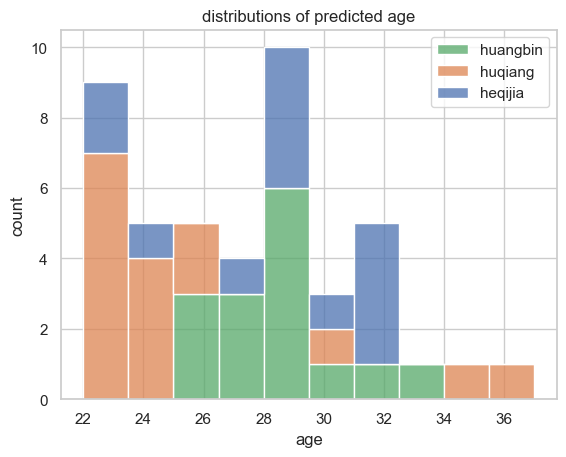

In [257]:
# age analysis:

# 三类不同人的年龄数据
data = {
    'huangbin': age1,
    'huqiang': age2,
    'heqijia': age3
}

# 将数据转换为堆叠直方图的格式
stacked_data = [data[key] for key in data]

# 绘制堆叠直方图
sns.set(style='whitegrid')  # 设置绘图风格
sns.histplot(stacked_data, bins=10, kde=False, stat='count', element="bars", multiple="stack")

# 设置图例和标签
plt.legend(labels=list(data.keys()))
plt.xlabel('age')
plt.ylabel('count')
plt.title('distributions of predicted age')

# 显示图形
plt.savefig("./analysis/distributions of predicted age.png")
plt.show()

In [258]:
def normalize_list(lst):
    min_value = min(lst)
    max_value = max(lst)
    normalized_lst = [(element - min_value) / (max_value - min_value) for element in lst]
    return normalized_lst

total_emo=[]
temp=[0,0,0,0,0,0,0]
for i in emotion1:
    temp=[x + y for x, y in zip(temp, i)]
total_emo.append(normalize_list(temp))

temp=[0,0,0,0,0,0,0]
for i in emotion2:
    temp=[x + y for x, y in zip(temp, i)]
total_emo.append(normalize_list(temp))

temp=[0,0,0,0,0,0,0]
for i in emotion3:
    temp=[x + y for x, y in zip(temp, i)]
total_emo.append(normalize_list(temp))

In [296]:
import pandas as pd

names = ['Huangbin', 'Huqiang', 'Heqijia']
attributes = ['angry', 'disgust', 'fear','happy','sad','surprise','neutral']
data_matrix = np.array(total_emo)

df = pd.DataFrame(data_matrix, columns=attributes, index=names)
df.to_csv('analysis/emotion.csv', index=True)
df

,angry,disgust,fear,happy,sad,surprise,neutral
Huangbin,0.037291,0.0,0.097361,0.001331,0.191791,0.079930,1.0
Huqiang,0.378154,0.0,0.171394,0.447912,0.347290,0.015964,1.0
Heqijia,0.255622,0.0,0.099372,0.267569,0.248621,0.002929,1.0


{'emotion': {'angry': 0.16674090875312686,
  'disgust': 3.0802411288277654e-05,
  'fear': 1.0917446576058865,
  'happy': 0.22881135810166597,
  'sad': 3.416747972369194,
  'surprise': 0.3515328513458371,
  'neutral': 94.7443962097168},
 'dominant_emotion': 'neutral',
 'region': {'x': 54, 'y': 90, 'w': 207, 'h': 207},
 'age': 27,
 'gender': {'Woman': 0.08007841533981264, 'Man': 99.91992115974426},
 'dominant_gender': 'Man',
 'race': {'asian': 99.22586074183711,
  'indian': 0.1651553750409633,
  'black': 0.0016859925572011128,
  'white': 0.09604183704904759,
  'middle eastern': 0.00023243288111684032,
  'latino hispanic': 0.5110279334816853},
 'dominant_race': 'asian'}

In [265]:
total_race=[]
temp=[0,0,0,0,0,0,0]
for i in race1:
    temp=[x + y for x, y in zip(temp, i)]
total_race.append(normalize_list(temp))

temp=[0,0,0,0,0,0,0]
for i in race2:
    temp=[x + y for x, y in zip(temp, i)]
total_race.append(normalize_list(temp))

temp=[0,0,0,0,0,0,0]
for i in race3:
    temp=[x + y for x, y in zip(temp, i)]
total_race.append(normalize_list(temp))

In [295]:
import pandas as pd

names = ['Huangbin', 'Huqiang', 'Heqijia']
attributes = ['asian', 'indian', 'black','white','middle eastern','latino hispanic']
data_matrix = np.array(total_race)

df = pd.DataFrame(data_matrix, columns=attributes, index=names)
df.to_csv('analysis/race.csv', index=True)
df

,asian,indian,black,white,middle eastern,latino hispanic
Huangbin,1.0,0.014580,0.0,0.064979,0.025344,0.066141
Huqiang,1.0,0.010436,0.0,0.070726,0.046444,0.034297
Heqijia,1.0,0.012345,0.0,0.042112,0.024609,0.030761


In [287]:
total_sex=[]
temp=[0,0]
for i in sex1:
    temp=[x + y for x, y in zip(temp, i)]
total_sex.append([x/sum(temp) for x in temp])
temp=[0,0]
for i in sex2:
    temp=[x + y for x, y in zip(temp, i)]
total_sex.append([x/sum(temp) for x in temp])
temp=[0,0]
for i in sex3:
    temp=[x + y for x, y in zip(temp, i)]
total_sex.append([x/sum(temp) for x in temp])

In [294]:
import pandas as pd
total_sex
names = ['Huangbin', 'Huqiang', 'Heqijia']
attributes = ['female', 'male']
data_matrix = np.array(total_sex)

df = pd.DataFrame(data_matrix, columns=attributes, index=names)
df.to_csv('analysis/gender.csv', index=True)
df

,female,male
Huangbin,0.017654,0.982346
Huqiang,0.043199,0.956801
Heqijia,0.018051,0.981949
